In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv(r"C:\\Contents\\Kaggle\\fifa2019wages\\FifaTrainNew.csv")

df.head()

,Ob,WageNew,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1,26735,25,Austria,77,80,FC Augsburg,1971,Left,2.0,...,64.0,65.0,77.0,78.0,77.0,14.0,14.0,9.0,13.0,10.0
1,2,3709,22,Saudi Arabia,58,67,Al Wehda,1510,Right,1.0,...,48.0,43.0,52.0,54.0,56.0,7.0,7.0,12.0,11.0,14.0
2,3,4720,29,Austria,66,66,LASK Linz,1356,Right,1.0,...,42.0,63.0,65.0,64.0,66.0,9.0,11.0,8.0,6.0,12.0
3,4,31062,24,Sweden,71,73,Watford,1824,Left,1.0,...,44.0,62.0,36.0,49.0,48.0,7.0,11.0,10.0,16.0,7.0
4,5,43797,26,Colombia,80,84,Valencia CF,1847,Right,2.0,...,46.0,73.0,77.0,80.0,82.0,14.0,13.0,8.0,11.0,14.0


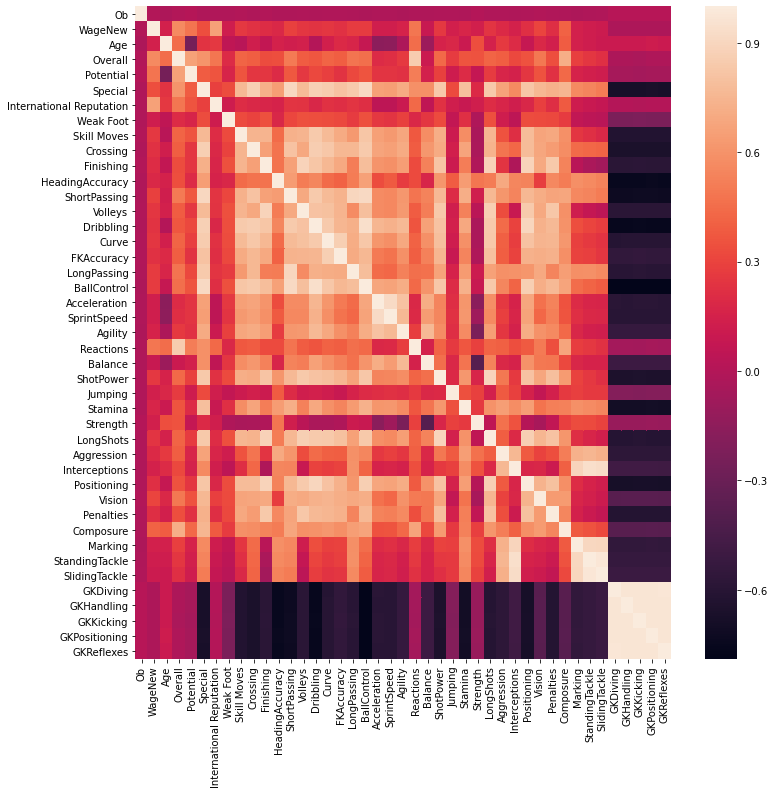

In [2]:
import seaborn as sb

plt.figure(figsize= (12,12))
sb.heatmap(df.corr())
plt.show()

In [3]:
for col in ('GKHandling','GKKicking','GKPositioning','GKReflexes', 'SlidingTackle', 'Interceptions'):
    del df[col]
    print("Deleted col {}".format(col))

Deleted col GKHandling
Deleted col GKKicking
Deleted col GKPositioning
Deleted col GKReflexes
Deleted col SlidingTackle
Deleted col Interceptions


In [4]:
def getWt(wt):
    try:
        return int(wt.split('lbs')[0])
    except:
        return wt
df['Weight'] = df['Weight'].apply(getWt)


In [5]:
def parse_ht(y):
    
    try:
        ht = str(y)
        ht_ = ht.split("'")
        ft_ = float(ht_[0])
        in_ = float(ht_[1].replace("\"",""))
        return (12*ft_) + in_
    except:
        return y

df["Height"] = df["Height"].apply(lambda x:parse_ht(x))

In [6]:
def parse_exp(y):
    
    try:
        lm = str(y)
        lm_ = lm.split("+")
        ft_ = float(lm_[0])
        
        return (ft_)
    except:
        return y
    
for col in ('LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'):
    df[col]=df[col].apply(lambda x:parse_exp(x))
    print("Parsed col {}".format(col))

Parsed col LS
Parsed col ST
Parsed col RS
Parsed col LW
Parsed col LF
Parsed col CF
Parsed col RF
Parsed col RW
Parsed col LAM
Parsed col CAM
Parsed col RAM
Parsed col LM
Parsed col LCM
Parsed col CM
Parsed col RCM
Parsed col RM
Parsed col LWB
Parsed col LDM
Parsed col CDM
Parsed col RDM
Parsed col RWB
Parsed col LB
Parsed col LCB
Parsed col CB
Parsed col RCB
Parsed col RB


In [7]:
corr_cols = ('ST', 'RS', 'RF', 'CF','RAM', 'CAM', 'CM', 'RCM', 'CDM', 'RDM', 'CB', 'RCB', 'Marking', 'LW', 'LF', 'RW','LAM', 'LM')

for x in corr_cols:
    del df[x]
    print("Deleted {}".format(x))
    

Deleted ST
Deleted RS
Deleted RF
Deleted CF
Deleted RAM
Deleted CAM
Deleted CM
Deleted RCM
Deleted CDM
Deleted RDM
Deleted CB
Deleted RCB
Deleted Marking
Deleted LW
Deleted LF
Deleted RW
Deleted LAM
Deleted LM


In [8]:
corr_cols = ('LDM', 'RWB', 'LB', 'RB')

for x in corr_cols:
    del df[x]
    print("Deleted {}".format(x))
    

Deleted LDM
Deleted RWB
Deleted LB
Deleted RB


In [9]:
corr_cols = ('LCM', 'Height', 'Weight', 'GKDiving', 'Balance')

for x in corr_cols:
    del df[x]
    print("Deleted {}".format(x))
    

Deleted LCM
Deleted Height
Deleted Weight
Deleted GKDiving
Deleted Balance


In [10]:
dfn = df.dropna()

In [11]:
len(dfn)

10294

In [12]:
df=dfn

In [13]:
catcols = ['Nationality','Club','Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position']
df = pd.get_dummies(df, columns=catcols)
df.head()


,Ob,WageNew,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Joined,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,1,26735,25,77,80,1971,2.0,3.0,2.0,31-Aug-16,...,0,0,0,0,0,0,0,0,0,0
1,2,3709,22,58,67,1510,1.0,3.0,2.0,6-Jul-18,...,1,0,0,0,0,0,0,0,0,0
2,3,4720,29,66,66,1356,1.0,3.0,2.0,1-Jul-15,...,0,1,0,0,0,0,0,0,0,0
3,4,31062,24,71,73,1824,1.0,3.0,3.0,5-Jul-18,...,0,0,0,0,0,0,0,0,0,0
4,5,43797,26,80,84,1847,2.0,2.0,2.0,18-Aug-18,...,0,0,0,0,0,0,0,0,0,0


In [14]:
import datetime
from dateutil.parser import parse
from dateutil.tz import gettz

def getTS(dt):
    tzinfos = {'UTC' : gettz('Europe/London')}
    date_str = '{0} 00:00:00'.format(dt)
    str_to_dt = parse(date_str + ' UTC', tzinfos=tzinfos)
    return int(str_to_dt.timestamp())

df['Joined'] = df['Joined'].apply(getTS)

In [16]:
from sklearn.model_selection import train_test_split
feature_col_names = [col for col in df.columns if col not in set(['Ob','WageNew'])]
predicted_class_names = ['WageNew']

X = df[feature_col_names].values

Y = df[predicted_class_names].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [17]:
split_test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)


In [18]:
X_train[0].shape

(883,)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(884, input_dim = 883, kernel_initializer='normal', activation = 'relu' ))
model.add(Dense(256, kernel_initializer='normal', activation = 'relu' ))
model.add(Dense(1, kernel_initializer='normal', activation = 'relu' ))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 884)               781456    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               226560    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 1,008,273
Trainable params: 1,008,273
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 6896 samples, validate on 3398 samples
Epoch 1/150
6896/6896 [==============================] - 10s 1ms/step - loss: 475908350.5263 - val_loss: 179650314.8557
Epoch 2/150
6896/6896 [==============================] - 10s 1ms/step - loss: 265312395.8421 - val_loss: 149506232.2235
Epoch 3/150
6896/6896 [==============================] - 10s 1ms/step - loss: 250528785.1816 - val_loss: 281077953.8956
Epoch 4/150
6896/6896 [==============================] - 10s 1ms/step - loss: 201707565.6544 - val_loss: 593970642.2268
Epoch 5/150
6896/6896 [==============================] - 10s 1ms/step - loss: 168786295.2554 - val_loss: 1171778790.7270
Epoch 6/150
6896/6896 [==============================] - 10s 1ms/step - loss: 143672904.4124 - val_loss: 2088791401.4558
Epoch 7/150
6896/6896 [==============================] - 10s 1ms/step - loss: 119367357.4829 - val_loss: 3290712791.0060
Epoch 8/150
6896/6896 [==============================] - 10s 1ms/step - loss: 107304509.5178 - val_loss: 5254

6896/6896 [==============================] - 9s 1ms/step - loss: 3426703.8449 - val_loss: 426598423544.6757
Epoch 68/150
6896/6896 [==============================] - 9s 1ms/step - loss: 3037052.6191 - val_loss: 402261438981.3329
Epoch 69/150
6896/6896 [==============================] - 10s 1ms/step - loss: 2293482.9665 - val_loss: 470645149580.8425
Epoch 70/150
6896/6896 [==============================] - 10s 1ms/step - loss: 2739555.8593 - val_loss: 428036506424.0616
Epoch 71/150
6896/6896 [==============================] - 10s 1ms/step - loss: 2758526.0399 - val_loss: 449930359004.0353
Epoch 72/150
6896/6896 [==============================] - 10s 1ms/step - loss: 1868408.8371 - val_loss: 446739375799.0236
Epoch 73/150
6896/6896 [==============================] - 10s 1ms/step - loss: 3293862.1788 - val_loss: 432772738162.0060
Epoch 74/150
6896/6896 [==============================] - 10s 1ms/step - loss: 3789299.7112 - val_loss: 474263521583.8615
Epoch 75/150
6896/6896 [===============

6896/6896 [==============================] - 10s 1ms/step - loss: 1629961.6874 - val_loss: 206555790798.6378
Epoch 135/150
6896/6896 [==============================] - 10s 1ms/step - loss: 1787529.5039 - val_loss: 201488084350.4574
Epoch 136/150
6896/6896 [==============================] - 10s 1ms/step - loss: 1478583.1797 - val_loss: 191441714922.2516
Epoch 137/150
6896/6896 [==============================] - 10s 1ms/step - loss: 1856898.2606 - val_loss: 180630337105.4556
Epoch 138/150
6896/6896 [==============================] - 10s 1ms/step - loss: 1570835.5609 - val_loss: 160504078971.5710
Epoch 139/150
6896/6896 [==============================] - 10s 1ms/step - loss: 2053850.2132 - val_loss: 124405552867.6232
Epoch 140/150
6896/6896 [==============================] - 10s 1ms/step - loss: 2338088.7442 - val_loss: 99468904137.8480
Epoch 141/150
6896/6896 [==============================] - 10s 1ms/step - loss: 1752063.9683 - val_loss: 88608001267.5657
Epoch 142/150
6896/6896 [=======

In [23]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


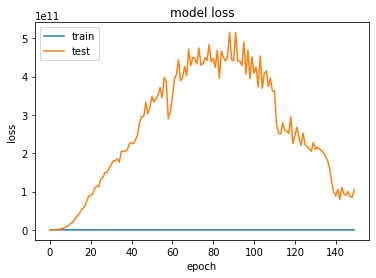

In [24]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(884, input_dim = 883, kernel_initializer='normal', activation = 'relu' ))
model.add(Dropout(0.2))
model.add(Dense(512, kernel_initializer='normal', activation = 'relu' ))
model.add(Dense(64, kernel_initializer='normal', activation = 'relu' ))
model.add(Dense(1, kernel_initializer='normal', activation = 'relu' ))


model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X, Y, validation_split=0.33, epochs=500)

Train on 6896 samples, validate on 3398 samples
Epoch 1/500
6896/6896 [==============================] - 5s 796us/step - loss: 497730259.1740 - val_loss: 182383160.5026
Epoch 2/500
6896/6896 [==============================] - 4s 646us/step - loss: 293144139.3875 - val_loss: 207743036.8687
Epoch 3/500
6896/6896 [==============================] - 5s 656us/step - loss: 246809684.1949 - val_loss: 391811084.1860
Epoch 4/500
6896/6896 [==============================] - 4s 650us/step - loss: 201435624.0220 - val_loss: 653524330.2696
Epoch 5/500
6896/6896 [==============================] - 4s 645us/step - loss: 165740669.0487 - val_loss: 1393880822.7475
Epoch 6/500
6896/6896 [==============================] - 4s 648us/step - loss: 136012718.1160 - val_loss: 2243463910.9358
Epoch 7/500
6896/6896 [==============================] - 4s 648us/step - loss: 109801077.4826 - val_loss: 3828749593.6033
Epoch 8/500
6896/6896 [==============================] - 4s 648us/step - loss: 91929874.0557 - val_los

6896/6896 [==============================] - 4s 650us/step - loss: 6627743.1859 - val_loss: 157912300271.7572
Epoch 68/500
6896/6896 [==============================] - 4s 649us/step - loss: 5539712.5228 - val_loss: 167720836097.9198
Epoch 69/500
6896/6896 [==============================] - 4s 650us/step - loss: 4685166.8854 - val_loss: 163279686002.0023
Epoch 70/500
6896/6896 [==============================] - 4s 648us/step - loss: 3291632.7219 - val_loss: 161851709091.7277
Epoch 71/500
6896/6896 [==============================] - 4s 649us/step - loss: 4352712.6552 - val_loss: 163103674038.1801
Epoch 72/500
6896/6896 [==============================] - 4s 649us/step - loss: 4556369.8949 - val_loss: 169839033992.9588
Epoch 73/500
6896/6896 [==============================] - 4s 648us/step - loss: 4825672.0979 - val_loss: 147048250269.9040
Epoch 74/500
6896/6896 [==============================] - 4s 650us/step - loss: 6118432.0179 - val_loss: 195021826355.0715
Epoch 75/500
6896/6896 [=====

6896/6896 [==============================] - 4s 645us/step - loss: 3091290.1613 - val_loss: 128177263048.3343
Epoch 134/500
6896/6896 [==============================] - 5s 653us/step - loss: 3833565.6059 - val_loss: 134323382532.8399
Epoch 135/500
6896/6896 [==============================] - 4s 649us/step - loss: 3651606.5587 - val_loss: 115075377487.7815
Epoch 136/500
6896/6896 [==============================] - 4s 649us/step - loss: 3573169.1538 - val_loss: 121737165335.9470
Epoch 137/500
6896/6896 [==============================] - 4s 650us/step - loss: 3790678.6027 - val_loss: 119599319341.7649
Epoch 138/500
6896/6896 [==============================] - 4s 647us/step - loss: 4666700.2213 - val_loss: 122689345183.8340
Epoch 139/500
6896/6896 [==============================] - 4s 651us/step - loss: 10858819.4498 - val_loss: 114054788051.3485
Epoch 140/500
6896/6896 [==============================] - 4s 648us/step - loss: 4181825.8918 - val_loss: 128821848754.6457
Epoch 141/500
6896/68

6896/6896 [==============================] - 4s 647us/step - loss: 4890331.4546 - val_loss: 71316196237.7834
Epoch 200/500
6896/6896 [==============================] - 4s 648us/step - loss: 3234472.9419 - val_loss: 76608011816.6541
Epoch 201/500
6896/6896 [==============================] - 4s 652us/step - loss: 4060186.6810 - val_loss: 69188487214.2351
Epoch 202/500
6896/6896 [==============================] - 5s 653us/step - loss: 2672460.5139 - val_loss: 64588610316.3846
Epoch 203/500
6896/6896 [==============================] - 4s 647us/step - loss: 2289407.0671 - val_loss: 70145238977.1185
Epoch 204/500
6896/6896 [==============================] - 4s 644us/step - loss: 4118887.3335 - val_loss: 66199869355.3902
Epoch 205/500
6896/6896 [==============================] - 4s 646us/step - loss: 3055841.3710 - val_loss: 60672589793.3328
Epoch 206/500
6896/6896 [==============================] - 4s 652us/step - loss: 2953654.9164 - val_loss: 63198299566.5739
Epoch 207/500
6896/6896 [=====

6896/6896 [==============================] - 4s 646us/step - loss: 4200715.1090 - val_loss: 46898283678.4918
Epoch 266/500
6896/6896 [==============================] - 4s 647us/step - loss: 3051147.9402 - val_loss: 39835344601.3465
Epoch 267/500
6896/6896 [==============================] - 4s 640us/step - loss: 3286149.6301 - val_loss: 41748273420.1825
Epoch 268/500
6896/6896 [==============================] - 4s 639us/step - loss: 4639420.4337 - val_loss: 44570848069.2190
Epoch 269/500
6896/6896 [==============================] - 4s 641us/step - loss: 3490826.8753 - val_loss: 37982262152.2840
Epoch 270/500
6896/6896 [==============================] - 4s 650us/step - loss: 2125819.9386 - val_loss: 39013259617.5182
Epoch 271/500
6896/6896 [==============================] - 4s 643us/step - loss: 4124786.0169 - val_loss: 42760188424.4144
Epoch 272/500
6896/6896 [==============================] - 4s 646us/step - loss: 2781136.9117 - val_loss: 41325043043.4970
Epoch 273/500
6896/6896 [=====

6896/6896 [==============================] - 4s 644us/step - loss: 1578925.2670 - val_loss: 26363584984.0312
Epoch 332/500
6896/6896 [==============================] - 4s 643us/step - loss: 2285928.9715 - val_loss: 26438827303.6779
Epoch 333/500
6896/6896 [==============================] - 4s 641us/step - loss: 2903595.3447 - val_loss: 26355552649.5226
Epoch 334/500
6896/6896 [==============================] - 4s 647us/step - loss: 2624865.4286 - val_loss: 25703121294.5432
Epoch 335/500
6896/6896 [==============================] - 4s 641us/step - loss: 2554126.7806 - val_loss: 28623198902.5667
Epoch 336/500
6896/6896 [==============================] - 4s 640us/step - loss: 2972483.5652 - val_loss: 29617612313.1533
Epoch 337/500
6896/6896 [==============================] - 4s 640us/step - loss: 2803926.6980 - val_loss: 25325121808.6881
Epoch 338/500
6896/6896 [==============================] - 4s 639us/step - loss: 2599589.5836 - val_loss: 28095476943.6416
Epoch 339/500
6896/6896 [=====

Epoch 398/500
6896/6896 [==============================] - 4s 641us/step - loss: 1610885.3052 - val_loss: 18980393564.3376
Epoch 399/500
6896/6896 [==============================] - 4s 641us/step - loss: 2448284.2124 - val_loss: 19468030104.3472
Epoch 400/500
6896/6896 [==============================] - 4s 643us/step - loss: 4206321.5387 - val_loss: 16304560718.9517
Epoch 401/500
6896/6896 [==============================] - 4s 638us/step - loss: 1657895.4443 - val_loss: 17193370100.8682
Epoch 402/500
6896/6896 [==============================] - 5s 655us/step - loss: 1685017.3446 - val_loss: 17161332502.8381
Epoch 403/500
6896/6896 [==============================] - 4s 639us/step - loss: 2176480.7524 - val_loss: 16686309790.2304
Epoch 404/500
6896/6896 [==============================] - 4s 636us/step - loss: 2122679.6618 - val_loss: 17826565489.2090
Epoch 405/500
6896/6896 [==============================] - 4s 640us/step - loss: 3092411.4983 - val_loss: 17285142156.8289
Epoch 406/500
68

6896/6896 [==============================] - 4s 643us/step - loss: 1365298.0654 - val_loss: 12040670244.4971
Epoch 465/500
6896/6896 [==============================] - 4s 650us/step - loss: 1452513.4410 - val_loss: 12459911103.7770
Epoch 466/500
6896/6896 [==============================] - 4s 642us/step - loss: 2901586.9333 - val_loss: 11492903620.8446
Epoch 467/500
6896/6896 [==============================] - 4s 639us/step - loss: 3481670.2230 - val_loss: 11427460585.1387
Epoch 468/500
6896/6896 [==============================] - 4s 644us/step - loss: 2083060.4842 - val_loss: 10896428498.9907
Epoch 469/500
6896/6896 [==============================] - 4s 643us/step - loss: 1797538.3291 - val_loss: 11270026579.5539
Epoch 470/500
6896/6896 [==============================] - 4s 643us/step - loss: 2037320.8475 - val_loss: 11220502744.4637
Epoch 471/500
6896/6896 [==============================] - 4s 642us/step - loss: 2614529.9859 - val_loss: 11212461094.7965
Epoch 472/500
6896/6896 [=====

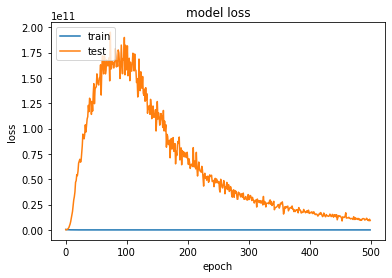

In [27]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
